In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
x_train = np.array(np.arange(11,dtype=np.float32)).reshape(-1,1)
y_train = 2*x_train+1


In [3]:
class linearRegression(torch.nn.Module):
    def __init__(self,inputSize,outputSize):
        super(linearRegression,self).__init__()
        self.linear = torch.nn.Linear(inputSize,outputSize)
        
    def forward(self,x):
        out = self.linear(x)
        return out

In [5]:
model = linearRegression(1,1) # linear model with 1 inputSize and 1 outputSize
criterion = torch.nn.MSELoss() # Mean Squared Error loss function
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # stochastic gradient descent with 0.01 learning rate

In [27]:
for epoch in range(100):
    inputs = torch.autograd.Variable(torch.from_numpy(x_train))
    labels = torch.autograd.Variable(torch.from_numpy(y_train))
    
    # clear gradient buffers
    optimizer.zero_grad()
    
    # get output from model
    outputs = model(inputs)
    
    # get loss
    loss = criterion(outputs,labels)
    # get gradients w.r.t. to parameters
    loss.backward()
    
    # update parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.item()))
    if loss.item()<=1E-10:
        break

epoch 0, loss 9.573594694778365e-11


<class 'numpy.ndarray'>


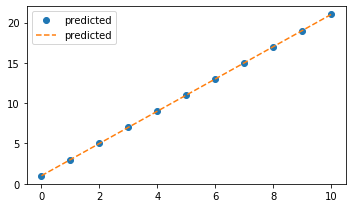

In [28]:
# plot results
with torch.no_grad():
    predicted = model(torch.autograd.Variable(torch.from_numpy(x_train))).data.numpy()
    print(type(predicted))
    
fig,ax=plt.subplots(figsize=(5,3))
ax.plot(x_train,y_train,'o',label='predicted')
ax.plot(x_train,predicted,'--',label='predicted')
ax.legend(loc='best',numpoints=1)
fig.tight_layout()